<div style="border:solid green 2px; padding: 20px">
    
<b> Hello, Dan!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The analysis on phone user data will first involve initializing, loading, and preparing the data. From here, the revenue of each user will be determined and aggregated on a monthly basis. This will allow for a comparison of calling, messaging, and internet usage behaviours between surf and ultimate plan users. Revenue will also be compared and used when looking to hypothesis testing. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

Load appropriate libraries.

In [1]:
# For loading and manipulating dataframe objects
import pandas as pd 
import numpy as np 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# For hypothesis testing
from scipy import stats

## Load data

Read users, calls, messages, internet, and plans CSV files. Save approriately.

In [2]:
# Load the data files into different DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Prepare the data

Each dataframe will be prepared by first looking into each datasets values and data types. These will be evaluated, fixed and enriched where appropriate.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


No missing data exists and all data is in the correct data type. We can reorder the data so that the plan name is given first.

### Fix data

Reorder columns

In [5]:
# Reorder columns
# Save list of columns
cols = plans.columns.tolist()

# Reorder last value as first followed by others
cols = cols[-1:] + cols[:-1]

# Save plans with reorders cols
plans = plans[cols]

# Show plans
plans

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


### Enrich data

Add a column for megabytes to gigabytes conversion. This will be helpful later when determing how many gigabytess have been used. 1024 megabytes equate to one gigabyte.

In [6]:
# Set gb_per_month as mb_per_month divided by 1024 
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Drop mb_per_month_included column
plans = plans.drop(columns='mb_per_month_included')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, there are 1,024 megabytes in one gigabyte.

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN
395,1395,Leonard,Wooten,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,ultimate,NaN
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaN
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaN


In [9]:
# ID column should only contain unique values. Check for duplicates by counting values for id
users['user_id'].value_counts(ascending=False)

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

The registration and churn date is in the form of an object. This needs to be changed to date-time using pandas. The city also includes 'MSA' at the end of each string. This will be removed using the replace method. The User ID column only contains unique values so no duplicates exist.

### Fix Data

Change registration and churn dates to date-time.

In [10]:
# reg_date to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])

# churn_date to datetime
users['churn_date'] = pd.to_datetime(users['churn_date'])

Replace' MSA' within city columns.

In [11]:
#replace 'MSA' in city column with blank
users['city'] = users['city'].str.replace(' MSA','') 

## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Print a sample of data for calls
calls.sample(10)

,id,user_id,call_date,duration
117475,1411_69,1411,2018-10-19,2.79
65776,1237_383,1237,2018-09-17,3.43
107413,1381_150,1381,2018-10-11,0.00
35529,1132_1058,1132,2018-12-25,3.66
41106,1151_284,1151,2018-12-01,8.56
39186,1146_243,1146,2018-12-07,11.48
41784,1153_614,1153,2018-11-20,0.55
69154,1248_61,1248,2018-12-24,14.87
134055,1488_152,1488,2018-08-28,0.00
75088,1264_460,1264,2018-11-02,0.00


In [14]:
# ID column should only contain unique values. Check for duplicates by counting values for id
calls['id'].value_counts(ascending=False).head()

1185_4      1
1192_643    1
1412_524    1
1014_770    1
1030_18     1
Name: id, dtype: int64

Call date will be converted to date-time. Since call minutes are rounded up to the nearest number, duration type will be converted to an integer. Values round down when using this method, so each are increased by one to reflect plan terms where each minute is rounded up.  All User IDs are unique. 

### Fix data

Convert call date to date-time.

In [15]:
# Convert call date to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

Round up duration to the nearest minute, save column as an integer

In [16]:
# Round duration up using np.ceil()
calls['duration'] = np.ceil(calls['duration'])

# Save as type int
calls['duration'] = calls['duration'].astype('int')

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Incorrect implementation. We need to round up. The np.ceil() method is suitable for this purpose

<div class="alert alert-info"> <b>Student сomments:</b> Thanks for the tip! I don't believe this is in the course. <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right. It's a method you learned in your course

### Enrich data

Create a column to group data by month.

In [17]:
# Assign new column 'month'
calls['month'] = calls['call_date'].dt.month

## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Print a sample of data for messages
messages.sample(5)

,id,user_id,message_date
52962,1339_96,1339,2018-09-13
43374,1287_48,1287,2018-12-11
21383,1132_699,1132,2018-11-16
41561,1267_72,1267,2018-12-09
8821,1065_92,1065,2018-12-26


In [20]:
# ID column should only contain unique values. Check for duplicates by counting values for id, descending order
messages['id'].value_counts(ascending=False).head()

1101_328    1
1028_287    1
1036_147    1
1056_65     1
1460_413    1
Name: id, dtype: int64

Message date will be converted to date-time. Other wise, dtypes are appropriate, no missing data is shown, and all ID values are unique.

### Fix data

Convert message date to date-time.

In [21]:
# Convert message date to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enrich data

As with calls data, assign new column 'month'.

In [22]:
# Assign new column 'month'
messages['month'] = messages['message_date'].dt.month

## Internet

In [23]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# Print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
33804,1153_376,1153,2018-07-04,0.00
94907,1442_26,1442,2018-12-21,0.00
66110,1305_327,1305,2018-08-18,132.44
16014,1072_429,1072,2018-12-01,166.18
11741,1057_81,1057,2018-11-06,1134.62


In [25]:
# ID column should only contain unique values. Check for duplicates by counting values for id, descending order
internet['id'].value_counts(ascending=False).head()

1185_4      1
1069_381    1
1010_90     1
1418_95     1
1468_324    1
Name: id, dtype: int64

Message date will be converted to date-time. As charges occur in gigabytes, data used will be converted to gigabytes. Otherwise, data types are appropriate, no missing data is shown, and all ID values are unique.

### Fix data

Convert session date to date time.

In [26]:
# Convert session date to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

As with above sets, create new column for month.

In [27]:
# Assign new column 'month'
internet['month'] = internet['session_date'].dt.month

Create new column for gigabytes used. Drop megabytes column after conversion.

In [28]:
# Create new column for gb used
internet['gb_used'] = internet['mb_used'] / 1024

# Drop mb_used column
internet = internet.drop(columns = 'mb_used')

## Study plan conditions

Print study plan condtions to make sure they are understood.

In [29]:
# Print out the plan conditions
plans

,plan_name,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,surf,50,500,20,10,0.03,0.03,15.0
1,ultimate,1000,3000,70,7,0.01,0.01,30.0


## Aggregate data per user

Aggregating the data will make it easier to analyze how a user behaves in a one month period. 

For calls, messages and internet dataframes, group data by user ID and month. Save appropriate metrics that will be necessary to determine revenue as outlined by the plan above.

Once data is grouped, the data is aggregated with merges. This is done with outer merges to ensure that users who may not call, text or use data are all accounted for. Note however that this assumes that all users do one of those activities.

### Group Data

In [30]:
# Calculate the number of calls made by each user per month. Save the result.
calls_num = calls.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={'id': 'calls'})

In [31]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_mins = calls.groupby(['user_id','month'])['duration'].sum().reset_index().rename(columns={'duration': 'call_minutes'})

In [32]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_num = messages.groupby(['user_id','month'])['id'].count().reset_index().rename(columns={'id': 'messages'})

In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_vol = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()

# Round up Gigabyte values
internet_vol['gb_used'] = np.ceil(internet_vol['gb_used'])

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

At the end of each month, the Gb's are rounded up. Can you fix it, please?

<div class="alert alert-info"> <b>Student сomments:</b> Ohh that makes sense. It makes my revenue calculation below way cleaner too, thank-you <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great!)

### Merge Data

In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df = calls_num.merge(calls_mins, on=['user_id','month'], how='outer') \
            .merge(messages_num, on=['user_id','month'], how='outer') \
            .merge(internet_vol, on=['user_id','month'], how='outer')

In [35]:
# Add the plan information
# Merge plan type from users df
df = df.merge(users[['user_id','plan']], on='user_id')

In [36]:
# Merge plan information from plan on 'plan'
df = df.merge(plans, left_on='plan', right_on='plan_name')

#drop duplicated 'plan_name' column
df = df.drop(columns = 'plan_name')

In [37]:
# Replace NaN values with 0
df = df.fillna(0)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

### Calculate Revenue

This is done by adding the initial monthly payment with excess call duration, messaging and internet usage costs. A function that calculates the excess will be created that calculates charges when a user goes over the limit they have on a plan. This will then be utilized in a loop to calculate total revenue.

In [38]:
# Create function 'excess' that returns excess charges if the used service exceeds the service allotted
def excess(used, allotted, excess_rate):

    if used > allotted:
        return ((used - allotted) * excess_rate)
    else:
        return 0

In [39]:
# Create revenue list equal to 0, matched to length of df
revenue = [None] * len(df)

# Create loop length of df
for i in range(len(df)):
    # Add base monthly payment to 'revenue'
    revenue[i] = df['usd_monthly_pay'][i]
    
    # Add excess call duration costs
    revenue[i] += excess(df['call_minutes'][i], df['minutes_included'][i], df['usd_per_minute'][i])
    
    # Add excess message costs
    revenue[i] += excess(df['messages'][i], df['messages_included'][i], df['usd_per_message'][i])
    
    # Add excess data costs, convert gb_used to integer (rounds down) and add 1 (round up)
    revenue[i] += excess((df['gb_used'][i]), df['gb_per_month_included'][i], df['usd_per_gb'][i])

# Create revenue column equal to revenue values
df['revenue'] = revenue

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using your own functions

<div class="alert alert-info"> <b>Student сomments:</b> Thanks, I was stoked when I figured it out. Updated gb_used so it doesn't add another value when rounding up. I am seeing the value of np.ceil() <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

)))

## Study user behaviour

Whether the surf or ultimate plan results in greater revenue depends on excess charges. As the surf plan is 50 dollars cheaper, these excess charges must be result in 50 dollars per user. Thus, studying user behaviour and more specifically user calling, messaging and internet surfing is essential.

To highlight how surf and ultimate plan users behave, data will be plotted for each month from January to December. Histograms and boxplots will also be used to see how behaviour is distributed between users. Data is split into surf and ultimate users to determine mean averages, variances and standard devaiations. This will explain what users of each plan are doing and answer which plan is better.

In [40]:
# Save monthly user data for surf and ultimate plans
surf = df[df['plan'] == 'surf']

ultimate = df[df['plan'] == 'ultimate']

### Calls

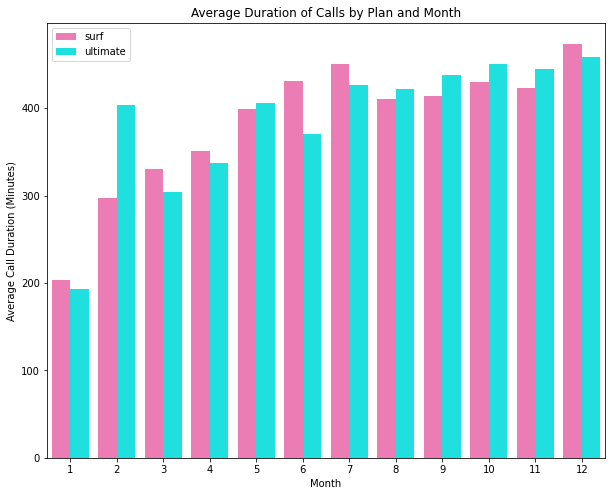

In [41]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

# Create groupby to find average duration  by each plan type and month
call_average = df.groupby(['plan','month'])['call_minutes'].mean().reset_index()

# Increase plot size
plt.figure(figsize=(10,8))

# Create barplot from seaborn, 
sns.barplot(data = call_average, x = 'month', y='call_minutes', hue = 'plan', 
            palette = ['hotpink','aqua'], ci = None) \
            .set(xlabel='Month', ylabel='Average Call Duration (Minutes)', \
                 title='Average Duration of Calls by Plan and Month')

plt.legend(loc='upper left')

plt.show()

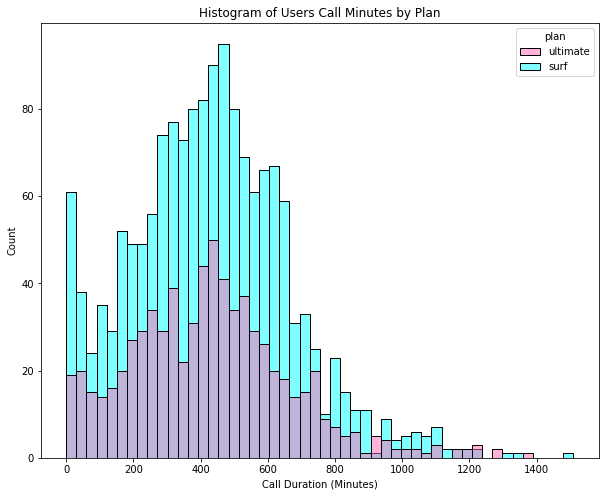

In [42]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Increase plot size
plt.figure(figsize=(10,8))

# Create histogram from seaborn
sns.histplot(data = df, x = 'call_minutes', hue = 'plan', \
            palette = ['hotpink','aqua'], bins = 50) \
            .set(xlabel='Call Duration (Minutes)', ylabel='Count', \
                 title='Histogram of Users Call Minutes by Plan')

plt.show()

In [43]:
# Calculate the mean and the variance of the monthly call duration

# Print surf duration mean
print('surf duration mean = ', surf['call_minutes'].mean().round(2))

# Print ultimate duration mean
print('ultimate duration mean = ', ultimate['call_minutes'].mean().round(2))

# Print surf duration variance
print('surf duration variance = ', surf['call_minutes'].var().round(2))

# Print ultimate duration variance
print('ultimate duration variance = ', ultimate['call_minutes'].var().round(2))

# Print surf duration variance
print('surf duration standard deviation = ', surf['call_minutes'].std().round(2))

# Print ultimate duration variance
print('ultimate duration standard deviation = ', ultimate['call_minutes'].std().round(2))

surf duration mean =  428.75
ultimate duration mean =  430.45
surf duration variance =  54968.28
ultimate duration variance =  57844.46
surf duration standard deviation =  234.45
ultimate duration standard deviation =  240.51


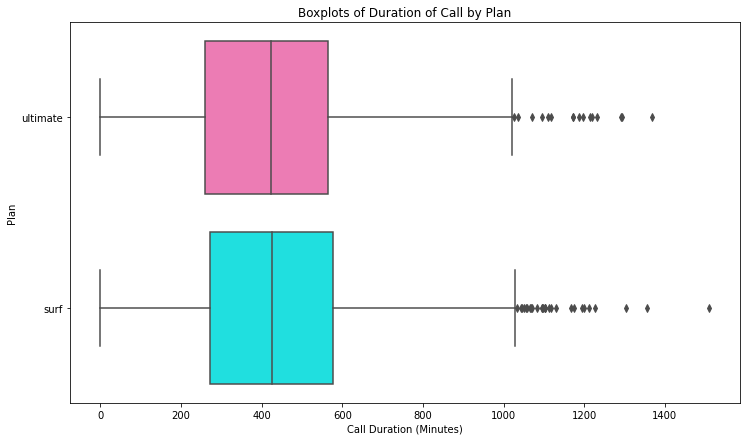

In [44]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Increase plot size
plt.figure(figsize=(12,7))

# Create boxplots of duration by 
sns.boxplot(data = df, x='call_minutes', y='plan', palette = ['hotpink','aqua'])\
                    .set(xlabel='Call Duration (Minutes)', ylabel='Plan', \
                     title='Boxplots of Duration of Call by Plan')

plt.show()

 **Analysis**: Despite having different call duration limits, ultimate and surf plan users show little difference in the time they spend talking on the phone. Whilst ultimate plan members were spending 100 minutes more on average in Febraury, surf users quickly caught up. By December, the average for both plan users is comparable at around 470 minutes. 
 
What's interesting is that ultimate users have an extra 2500 minutes accessible under their plan, but not many are exceeding 500, which is the other plans limit. This is shown in the histogram where both plan users peak at around 500 users. However, both are right skewed, showing that many surf users still go over their 500 minute limit. 

Duration means for both are almost exactly the same, yet are more likely to be balanced by the large number of users who call very rarely and outliers who use upto 1400 minutes per month. Interestingly, no ultimate users get anywhere near their 3000 minute cap. Ultimate users do show a slightly higher variance among duration, and so results among ultimate users are more varied than surf users.

**Conclusion:** The surf user plan should create more revenue as over 25% go over their limits. This compares to 0% of ultimate users. However, this is not enough by itself to overcome the initial price difference of 50 dollars. At most, the surf user with 1500 minutes is paying 30 dollars. Further analysis is needed to see if messages and internet usage could tip this value up more.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for signing the axes of the graphs

<div class="alert alert-info"> <b>Student сomments:</b> Cheers <div>

### Messages

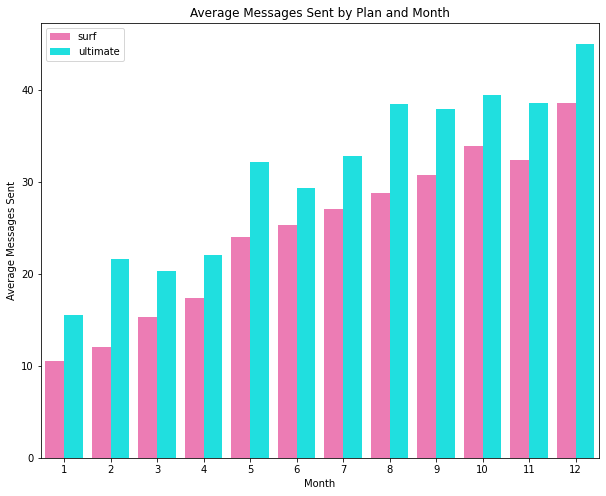

In [45]:
# Compare average messages per each plan per each distinct month. Plot a bar plot to visualize it.

# Create groupby to find average duration  by each plan type and month
message_average = df.groupby(['plan','month'])['messages'].mean().reset_index()

# Increase plot size
plt.figure(figsize=(10,8))

# Create barplot from seaborn, 
sns.barplot(data = message_average, x = 'month', y='messages', hue = 'plan', 
            palette = ['hotpink','aqua'], ci = None) \
            .set(xlabel='Month', ylabel='Average Messages Sent', \
                 title='Average Messages Sent by Plan and Month')

plt.legend(loc='upper left')

plt.show()

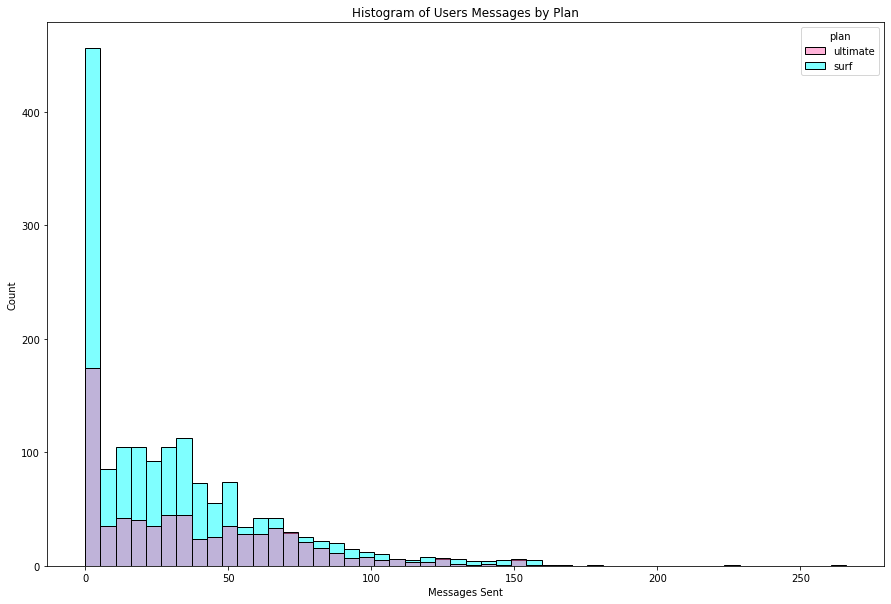

In [46]:
# Compare the number of messages users of each plan require each month. Plot a histogram.

# Increase plot size
plt.figure(figsize=(15,10))

# Create histogram from seaborn
sns.histplot(data = df, x = 'messages', hue = 'plan', \
            palette = ['hotpink','aqua'], bins = 50) \
            .set(xlabel='Messages Sent', ylabel='Count', \
                 title='Histogram of Users Messages by Plan')

plt.show()

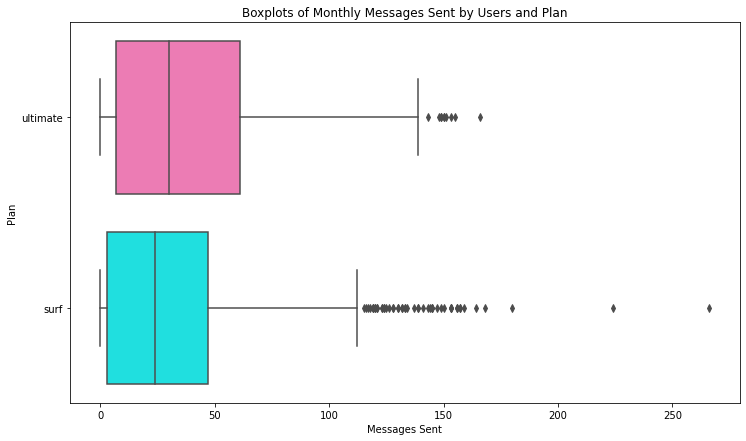

In [47]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Increase plot size
plt.figure(figsize=(12,7))

# Create boxplots of duration by 
sns.boxplot(data = df, x='messages', y='plan', palette = ['hotpink','aqua'])\
                    .set(xlabel='Messages Sent', ylabel='Plan', \
                     title='Boxplots of Monthly Messages Sent by Users and Plan')

plt.show()

In [48]:
# Calculate the mean, variance and standard deviation of monthly messages

# Print surf duration mean
print('surf messages mean = ', surf['messages'].mean().round(2))

# Print ultimate duration mean
print('ultimate messages mean = ', ultimate['messages'].mean().round(2))

print('')

# Print surf duration variance
print('surf messages variance = ', surf['messages'].var().round(2))

# Print ultimate duration variance
print('ultimate messages variance = ', ultimate['messages'].var().round(2))

print('')

# Print surf duration standard deviation
print('surf messages variance = ', surf['messages'].std().round(2))

# Print ultimate duration standard deviation
print('ultimate messages variance = ', ultimate['messages'].std().round(2))

surf messages mean =  31.16
ultimate messages mean =  37.55

surf messages variance =  1126.72
ultimate messages variance =  1208.76

surf messages variance =  33.57
ultimate messages variance =  34.77


**Analysis**: A bigger difference in messages exists between users of differing plans than that of call duration. Ultimate plan users average about 5 more messages each month, albeit still under the surf plan cap. However, the trend seems to be increasing so it will be interesting to see if surf users will overcome this level in the coming months. 

This finding remains true as the histogram shows many users that don't send any messages. Ultimate users do proportionally tend to send more with a higher median value. The mean shows that ultimate users send over six messages more. However, the difference in standard deviation is slight and so results vary at around the same rate, albeit around a higher mean for ultimate users.

**Conclusion**: Ultimate plan users are not paying extra for text messages whilst texting more. 25% of Surf plan users are paying, however, at 3 cents per message. This total price is much smaller than what calling minutes are providing. For instance, even if all surf users were messaging as much as the highest monthly user, this would only be around 7 dollars.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's great!)

### Internet

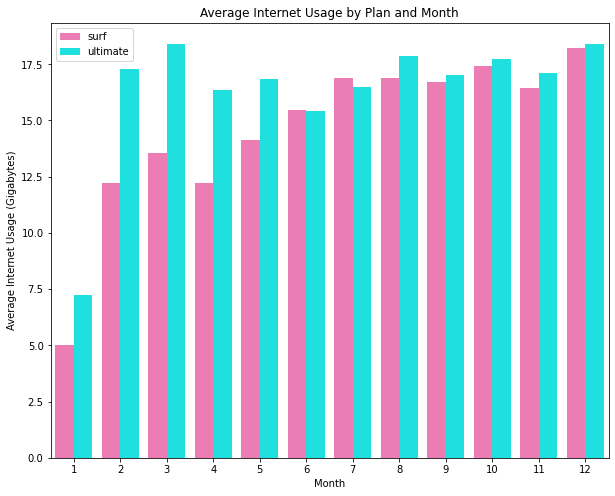

In [49]:
# Compare average internet usage per each plan per each distinct month. Plot a bar plot to visualize it.

# Create groupby to find average duration  by each plan type and month
usage_average = df.groupby(['plan','month'])['gb_used'].mean().reset_index()

# Increase plot size
plt.figure(figsize=(10,8))

# Create barplot from seaborn, 
sns.barplot(data = usage_average, x = 'month', y='gb_used', hue = 'plan', 
            palette = ['hotpink','aqua'], ci = None) \
            .set(xlabel='Month', ylabel='Average Internet Usage (Gigabytes)', \
                 title='Average Internet Usage by Plan and Month')

plt.legend(loc='upper left')

plt.show()

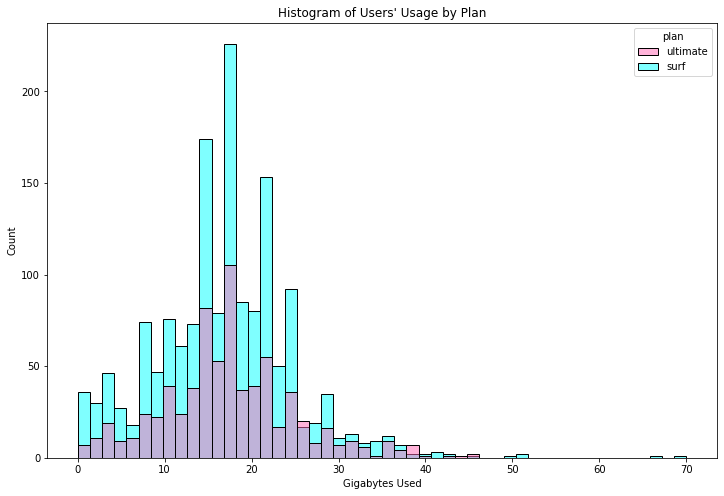

In [50]:
# Compare the users internet usage of each plan require each month. Plot a histogram.

# Increase plot size
plt.figure(figsize=(12,8))

# Create histogram from seaborn
sns.histplot(data = df, x = 'gb_used', hue = 'plan', \
            palette = ['hotpink','aqua'], bins = 50) \
            .set(xlabel='Gigabytes Used', ylabel='Count', \
                 title="Histogram of Users' Usage by Plan")

plt.show()

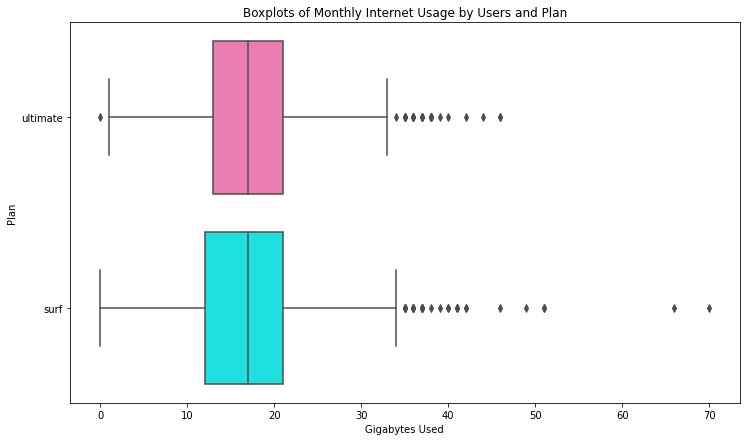

In [51]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Increase plot size
plt.figure(figsize=(12,7))

# Create boxplots of duration by 
sns.boxplot(data = df, x='gb_used', y='plan', palette = ['hotpink','aqua'])\
                    .set(xlabel='Gigabytes Used', ylabel='Plan', \
                     title='Boxplots of Monthly Internet Usage by Users and Plan')

plt.show()

In [52]:
# Calculate the mean, variance and standard deviation of monthly messages

# Print surf duration mean
print('surf internet usage mean = ', surf['gb_used'].mean().round(2))

# Print ultimate duration mean
print('ultimate internet usage mean = ', ultimate['gb_used'].mean().round(2))

print('')

# Print surf duration variance
print('surf internet usage variance = ', surf['gb_used'].var().round(2))

# Print ultimate duration variance
print('ultimate internet usage variance = ', ultimate['gb_used'].var().round(2))

print('')

# Print surf duration variance
print('surf internet usage standard deviation = ', surf['gb_used'].std().round(2))

# Print ultimate duration variance
print('ultimate internet usage standard deviation = ', ultimate['gb_used'].std().round(2))

surf internet usage mean =  16.67
ultimate internet usage mean =  17.31

surf internet usage variance =  61.58
ultimate internet usage variance =  58.83

surf internet usage standard deviation =  7.85
ultimate internet usage standard deviation =  7.67


**Analysis**: Internet usage at the start of the year did vary, but has evened out towards the end of the year. In February and March, ultimate users consumed on average 5 gigabytes more than surf users. However, from June onwards, the difference has been trivial. By the end of the year, users on both plans are averaging almost 17.5 gigabytes per month. For surf users this is higher than their allotted 15 gigabytes, but still significantly under ultimates allotted 30 gigabytes. 

There do seem to be proportionally more surf users who use very little data, but apart from that, distributions between the two plans follow a similar pattern. Where some surf users have used more than 50 gigabytes, none exist among ultimate plan users. The mean average is higher in ultimate users by over 0.6 gigabytes, but variance is higher among surf users.

**Conclusion**: Whilst some ultimate users are paying for excess internet, almost half of surf users are. As the cost for an extra gigabyte is 7 dollars, this becomes a significant revenue source. 25 percent of surf users are paying atleast 50 dollars extra for internet. This in combination with call duration and message costs may be enough to make the surf plan more profitable so long as users continue to behave similarly. An analysis on total revenue itself will shed more light.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

After correcting the rounding of gigabytes, the data will change

<div class="alert alert-info"> <b>Student сomments:</b> Hopefully that looks right now <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Right!)

## Revenue

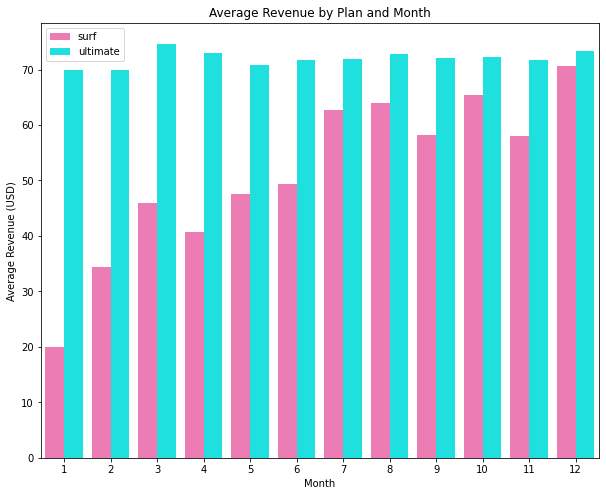

In [53]:
# Compare average revenue per each plan per each distinct month. Plot a bar plot to visualize it.

# Create groupby to find average duration  by each plan type and month
usage_average = df.groupby(['plan','month'])['revenue'].mean().reset_index()

# Increase plot size
plt.figure(figsize=(10,8))

# Create barplot from seaborn, 
sns.barplot(data = usage_average, x = 'month', y='revenue', hue = 'plan', 
            palette = ['hotpink','aqua'], ci = None) \
            .set(xlabel='Month', ylabel='Average Revenue (USD)', \
                 title='Average Revenue by Plan and Month')

plt.legend(loc='upper left')

plt.show()

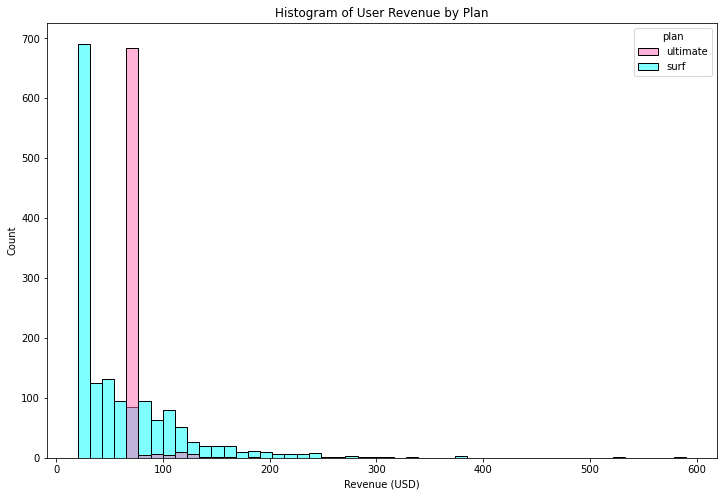

In [54]:
# Compare the users internet usage of each plan require each month. Plot a histogram.

# Increase plot size
plt.figure(figsize=(12,8))

# Create histogram from seaborn
sns.histplot(data = df, x = 'revenue', hue = 'plan', \
            palette = ['hotpink','aqua'], bins = 50) \
            .set(xlabel='Revenue (USD)', ylabel='Count', \
                 title="Histogram of User Revenue by Plan")

plt.show()

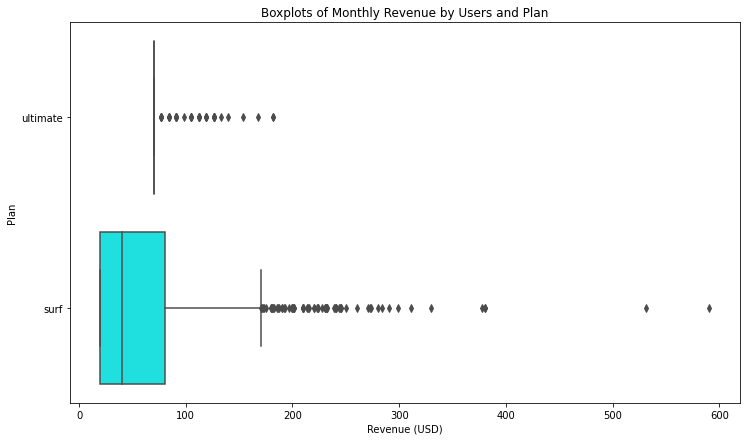

In [55]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Increase plot size
plt.figure(figsize=(12,7))

# Create boxplots of duration by 
sns.boxplot(data = df, x='revenue', y='plan', palette = ['hotpink','aqua'])\
                    .set(xlabel='Revenue (USD)', ylabel='Plan', \
                     title='Boxplots of Monthly Revenue by Users and Plan')

plt.show()

In [56]:
# Calculate the mean, variance and standard deviation of monthly messages

# Print surf duration mean
print('surf revenue mean = ', surf['revenue'].mean().round(2))

# Print ultimate duration mean
print('ultimate revenue mean = ', ultimate['revenue'].mean().round(2))

print('')

# Print surf duration variance
print('surf revenue variance = ', surf['revenue'].var().round(2))

# Print ultimate duration variance
print('ultimate revenue variance = ', ultimate['revenue'].var().round(2))

print('')

# Print surf duration variance
print('surf revenue standard deviation = ', surf['revenue'].std().round(2))

# Print ultimate duration variance
print('ultimate revenue standard deviation = ', ultimate['revenue'].std().round(2))

surf revenue mean =  60.71
ultimate revenue mean =  72.31

surf revenue variance =  3067.84
ultimate revenue variance =  129.85

surf revenue standard deviation =  55.39
ultimate revenue standard deviation =  11.4


**Analysis**: Average revenue from ultimate users has consistently outpaced that of surf users on a month to month basis. However, the gap has shrunk. In January, a mean difference of 50 dollars seperated the two plans, a number that has since significantly tightened to only a couple dollars in December. This has occured due to rises in mean revenue by surf users as ultimate revenue means have hovered around the 70 dollar mark.

Revenue distribution shows how a significant proportion of ultimate users rarely exceed their plan limits, whilst surf users frequently go over. A strong right tail shows that around 100 surf users pay the standard ultimate rate, but many also exceed this price. Atleast a couple dozen surf users spend well over 200 dollars, whereas no ultimate users spend the same amount.

Having said that, ultimate users still gain a higher revenue per user and month with a mean value of 72.31 dollars. This compares to 60.71 dollars paid by surf users under the same metric. However, the variance shows that surf users are capable of paying much more or less. The difference in standard deviation between the two is 44 dollars. This means 68 percent of surf users are paying approximately between 20 dollars (minimum) and 116 dollars. 

**Conclusion**: On a revenue basis the ultimate plan provides more, but if trends continue this will change as surf users continue to exceed their plan limits.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

<div class="alert alert-info"> <b>Student сomments:</b> Values in analysis updated to reflect new revenue calculation <div>

## Test statistical hypotheses

### Hypothesis Test 1 - Average Revenue Mean Between Different Plan Users

**Population**: User revenue data across all years

**Sample:** User revenue of 500 random samples from 2018 

**Null Hypothesis**: The average revenue from users of ultimate and surf calling plans are equal.

**Alternative Hypothesis**: The average revenue from users of ultimate and surf calling plans are not equal.

**Statistical Test**: Two-sided hypothesis test on the equality of two population means. Use ttest_ind from stats using surf and ultimate revenue as the two data samples. Variances are not similar, identify in equal_var.

**Alpha**: Reject null hypothesis if p-value < **0.05**.

**Note**: Don't we already know what the means are? I thought hypothesis testing was only done when we didn't have the population? Or is the dataset already a sample because the population includes other years which we don't have data for? I am running under the pretense of the latter scenerio.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation

<div class="alert alert-info"> <b>Student сomments:</b> Thanks, I re-read the project notes and must have missed that this is a sample <div>

In [57]:
# Save alpha value
alpha = 0.05

# Use ttest_ind to compare two dataset samples, set equal_var to false
results = stats.ttest_ind(surf['revenue'], ultimate['revenue'], equal_var = False )

# Print p-value
print('p-value:', results.pvalue)

# Print condition depending on pvalue compared to alpha
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.17039054811355e-15
We reject the null hypothesis


**Conclusion**: The null hypothesis that the mean revenue from users of ultimate and surf calling plans are equal is rejected.

### Hypothesis Test 2 - Average Revenue Between NY-NJ and Other Areas

**Population**: User revenue data across all years in NY-NJ and other areas

**Sample:** User revenue of 500 random samples from 2018 in NY-NJ and other areas

**Null Hypothesis**: The average revenue from users in NY-NJ and other areas are equal.

**Alternative Hypothesis**: The average revenue from users in NY-NJ and other areas are not equal.

**Statistical Test**: Two-sided hypothesis test on the equality of two population means.

**Alpha**: Reject null hypothesis if p-value < **0.05**.

In [58]:
# Merge location data from users to df, save as loc
loc = df.merge(users[['user_id','city']], on='user_id')

# Create ny_nj and other dataframes
ny_nj = loc[loc['city'] == 'New York-Newark-Jersey City, NY-NJ-PA']

other = loc[loc['city'] != 'New York-Newark-Jersey City, NY-NJ-PA']

In [59]:
# Test the hypotheses

# Use ttest_ind to compare two dataset samples, set equal_var to false
results = stats.ttest_ind(ny_nj['revenue'], other['revenue'])

# Print p-value
print('p-value:', results.pvalue)

# Print condition depending on pvalue compared to alpha
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04355743162134274
We reject the null hypothesis


**Conclusion**: The null hypothesis that the average revenue from users in NY-NJ and other areas are equal is rejected.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


After changing the revenue calculation, the result of the hypothesis may change

<div class="alert alert-info"> <b>Student сomments:</b> Changing the revenue calculation did not change either value. Looked through the dischord channel and notes to ensure my code is correct. Cannot seem to find the answer if it's wrong. <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct implementation. Well done

## General conclusion

### Revenue

The ultimate plan is the best for revenue. However, the surf plan is on the way to becoming the more profitable plan. This is due to surf plan user behaviour that shows that excess charges for calls, messages, and internet usage are all on the rise. Meanwhile, ultimate plan behavior is stagnant. In December, the difference in revenue between the two plans is almost negligible.


### Hypothesis Tests

- The mean revenue between ultimate and surf plan users is not the same. 
- The mean revenue between users in the NY-NJ area are not the same as those in other areas.

### Assumptions:

- User behavior will continue to behave as it has.
- The sample data provided is a fair representation of the true population.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Please correct the final output after correcting your project

<div class="alert alert-info"> <b>Student сomments:</b> Unfortunately nothing has changed. See above comment. <div>

<div class="alert alert-info"> <b>Student сomments:</b> Side note: what version of python are we using? I have found that some arguments were deprecated using my personal notebook. For instance, barplots do not accept the argument 'ci' which has been deprecated since version v0.12.0. Instead, errorbar is now used. I know this is likely not your fault, but it would be great to fix these moving forward. Do you know who the right person to be to address this? I ask not only to make projects easier to complete, but for our understanding when we start our professional careers in tech. Cheers! <div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Thanks for the question, here are the library versions:


    beautifulsoup4==4.9.3
    matplotlib==3.3.4
    nltk==3.6.1
    numpy==1.20.1
    pandas==1.2.4
    plotly==5.4.0
    psycopg2-binary==2.9.2
    pymorphy2==0.9.1
    pymorphy2-dicts==2.4.417127. 4579844
    pymystem3==0.2.0
    regex==2022.3.15
    scikit-learn==0.24.1
    scipy==1.8.0
    seaborn==0.11.1
    sqlalchemy==1.4.15
    statsmodels==0.13.2

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊